# Usando dados com pré-processamento de simetria horizontal

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from data.df_io import read, get_feat_lables
from data.df_prep import get_onexall_split, get_specific_split
from ai_models.regression import LogisticRegression
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line, show_mult_model_lines


train_path = Path("../digits/db/train_redu_h.csv")
test_path = Path("../digits/db/test_redu_h.csv")

In [2]:
df_train = read(train_path, sep=",")
df_test = read(test_path, sep=",")

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

# 1xAll

## Get 1xALL dataset

In [4]:
X_train_1xAll, Y_train_1xAll = get_onexall_split(X_train, Y_train, 1)
X_test_1xAll, Y_test_1xAll = get_onexall_split(X_test, Y_test, 1)

In [5]:
base_column = np.ones((X_train_1xAll.shape[0], 1))

In [6]:
X_train_1xAll = np.hstack((base_column, X_train_1xAll))

In [7]:
base_column = np.ones((X_test_1xAll.shape[0], 1))
X_test_1xAll = np.hstack((base_column, X_test_1xAll))

In [8]:
zeros_Y_train_1xAll = Y_train_1xAll.copy()
zeros_Y_train_1xAll[zeros_Y_train_1xAll == -1] = 0

zeros_Y_test_1xAll = Y_test_1xAll.copy()
zeros_Y_test_1xAll[zeros_Y_test_1xAll == -1] = 0

## Train and test 1xAll logistic regression

In [9]:
model4one = LogisticRegression(lr=0.001, n_iters=10000, bs=64)
model4one.fit(X_train_1xAll, zeros_Y_train_1xAll)
w4one = model4one.getW()

In [10]:
model4one.cost

np.float64(0.06648939695605974)

### Ein eval

In [11]:
Y_pred = model4one.predict(X_train_1xAll)
compute_acc(zeros_Y_train_1xAll, Y_pred)

1.0

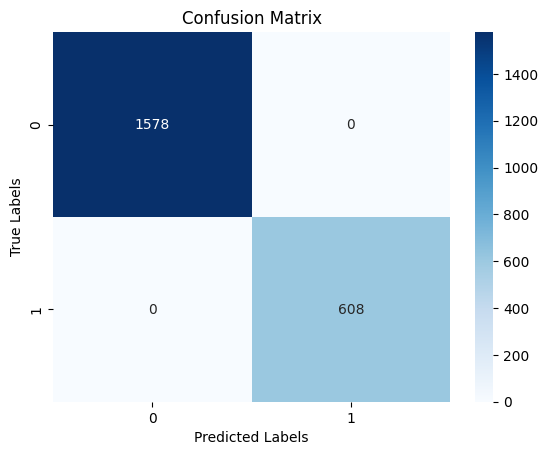

In [12]:
confusion(zeros_Y_train_1xAll, Y_pred, 0, 1)

### Eout eval

In [13]:
Y_pred = model4one.predict(X_test_1xAll)
compute_acc(zeros_Y_test_1xAll, Y_pred)

1.0

In [14]:
eficiency_report(zeros_Y_test_1xAll, Y_pred)

{'acc': 1.0,
 'precision': np.float64(1.0),
 'recall': np.float64(1.0),
 'f1': np.float64(1.0)}

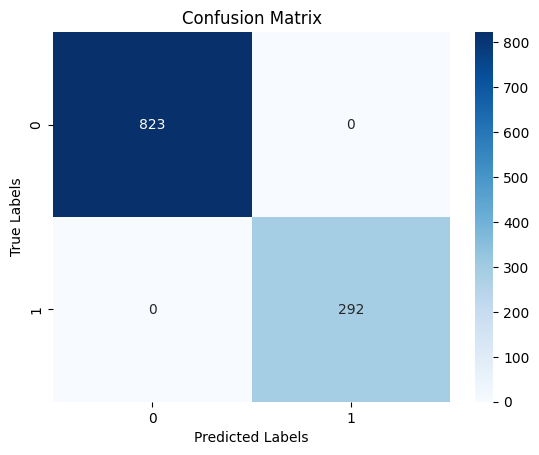

In [15]:
confusion(zeros_Y_test_1xAll, Y_pred, 0, 1)

### Model plot

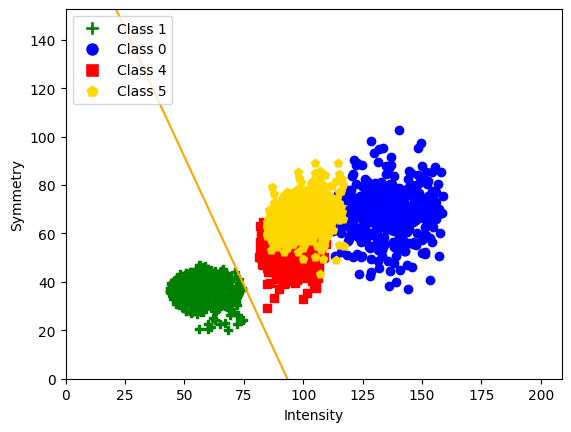

In [16]:
X_train_plot, Y_train_plot = get_onexall_split(X_train, Y_train, 1, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test, Y_test, 1, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4one,
    1,
    0,
    4,
    5,
)

# 0xAll (except 1)

## Get 0xAll (except 1) dataset

In [17]:
X_train4zero, Y_train4zero = get_feat_lables(df_train[df_train.label != 1])
X_test4zero, Y_test4zero = get_feat_lables(df_test[df_test.label != 1])

In [18]:
X_train_0xAll, Y_train_0xAll = get_onexall_split(X_train4zero, Y_train4zero, 0)
X_test_0xAll, Y_test_0xAll = get_onexall_split(X_test4zero, Y_test4zero, 0)

In [19]:
base_column = np.ones((X_train_0xAll.shape[0], 1))

In [20]:
X_train_0xAll = np.hstack((base_column, X_train_0xAll))

In [21]:
base_column = np.ones((X_test_0xAll.shape[0], 1))
X_test_0xAll = np.hstack((base_column, X_test_0xAll))

In [22]:
zeros_Y_train_0xAll = Y_train_0xAll.copy()
zeros_Y_train_0xAll[zeros_Y_train_0xAll == -1] = 0

zeros_Y_test_0xAll = Y_test_0xAll.copy()
zeros_Y_test_0xAll[zeros_Y_test_0xAll == -1] = 0

## Train and test 0xAll logistic regression

In [23]:
model4zero = LogisticRegression(lr=0.001, n_iters=10000, bs=64)
model4zero.fit(X_train_0xAll, zeros_Y_train_0xAll)
w4zero = model4zero.getW()

In [24]:
model4zero.cost

np.float64(0.22787059567815418)

### Ein eval

In [25]:
Y_pred = model4zero.predict(X_train_0xAll)
compute_acc(zeros_Y_train_0xAll, Y_pred)

0.9347275031685678

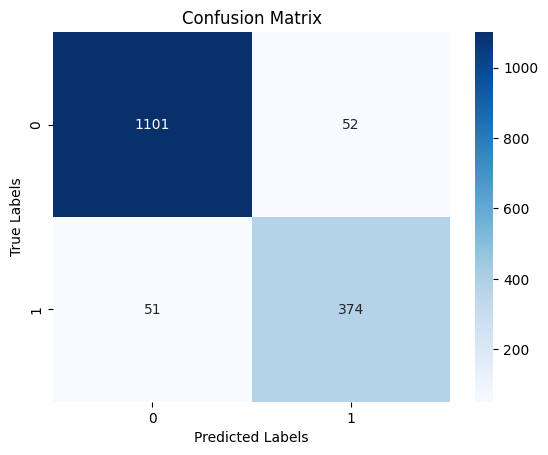

In [26]:
confusion(zeros_Y_train_0xAll, Y_pred, 0, 1)

### Eout eval

In [27]:
Y_pred = model4zero.predict(X_test_0xAll)
compute_acc(zeros_Y_test_0xAll, Y_pred)

0.93681652490887

In [28]:
eficiency_report(zeros_Y_test_0xAll, Y_pred)

{'acc': 0.93681652490887,
 'precision': np.float64(0.8772727272727273),
 'recall': np.float64(0.8853211009174312),
 'f1': np.float64(0.8812785388127854)}

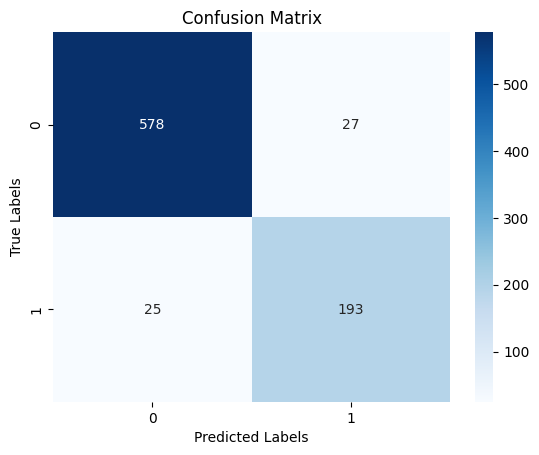

In [29]:
confusion(zeros_Y_test_0xAll, Y_pred, 0, 1)

### Model plot

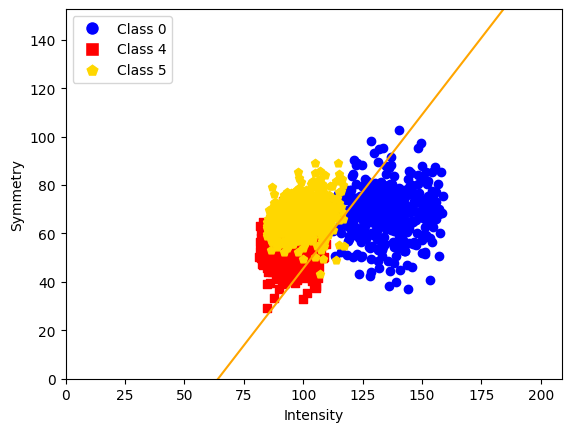

In [30]:
X_train_plot, Y_train_plot = get_onexall_split(X_train4zero, Y_train4zero, 0, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test4zero, Y_test4zero, 0, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4zero,
    0,
    4,
    5,
    None
)

# 4x5

## Get 4x5 dataset

In [31]:
X_train_4x5, Y_train_4x5 = get_specific_split(X_train, Y_train, 4, 5)
X_test_4x5, Y_test_4x5 = get_specific_split(X_test, Y_test, 4, 5)

In [32]:
base_column = np.ones((X_train_4x5.shape[0], 1))

In [33]:
X_train_4x5 = np.hstack((base_column, X_train_4x5))

In [34]:
base_column = np.ones((X_test_4x5.shape[0], 1))
X_test_4x5 = np.hstack((base_column, X_test_4x5))

In [35]:
zeros_Y_train_4x5 = Y_train_4x5.copy()
zeros_Y_train_4x5[zeros_Y_train_4x5 == -1] = 0

zeros_Y_test_4x5 = Y_test_4x5.copy()
zeros_Y_test_4x5[zeros_Y_test_4x5 == -1] = 0

## Train and test 4x5 logistic regression

In [36]:
model4four = LogisticRegression(lr=0.0001, n_iters=10000, bs=64)
model4four.fit(X_train_4x5, zeros_Y_train_4x5)
w4four = model4four.getW()

In [37]:
model4four.cost

np.float64(0.583161373451021)

### Ein eval

In [38]:
Y_pred = model4four.predict(X_train_4x5)
compute_acc(zeros_Y_train_4x5, Y_pred)

0.6834345186470078

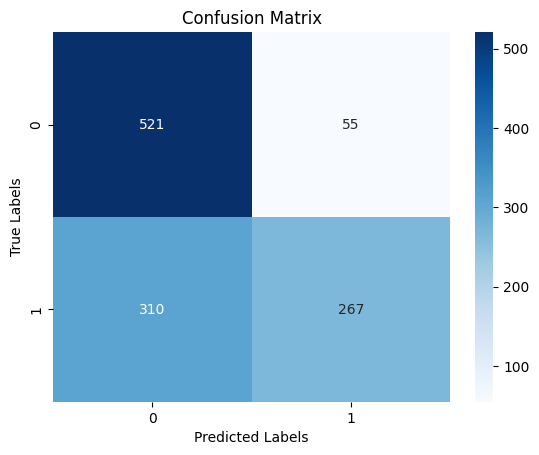

In [39]:
confusion(zeros_Y_train_4x5, Y_pred, 0, 1)

### Eout eval

In [40]:
Y_pred = model4four.predict(X_test_4x5)
compute_acc(zeros_Y_test_4x5, Y_pred)

0.6958677685950413

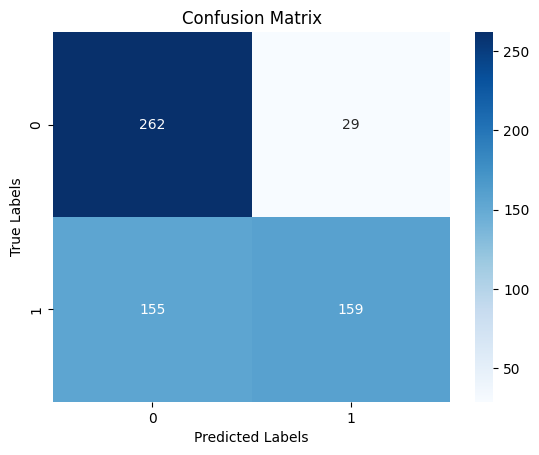

In [41]:
confusion(zeros_Y_test_4x5, Y_pred, 0, 1)

In [42]:
eficiency_report(zeros_Y_test_4x5, Y_pred)

{'acc': 0.6958677685950413,
 'precision': np.float64(0.8457446808510638),
 'recall': np.float64(0.5063694267515924),
 'f1': np.float64(0.6334661354581673)}

### Model plot

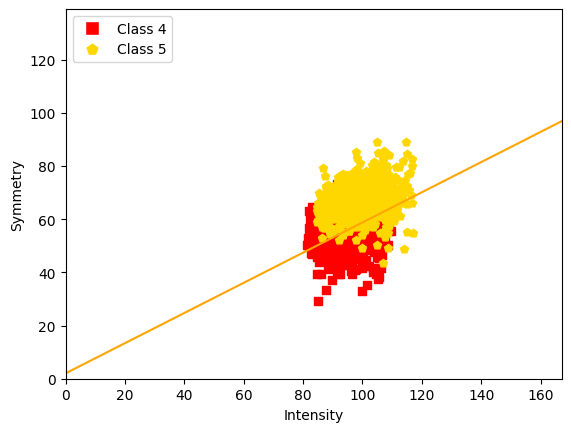

In [43]:
X_train_plot, Y_train_plot = get_specific_split(X_train, Y_train, 4, 5, False)
X_test_plot, Y_test_plot = get_specific_split(X_test, Y_test, 4, 5, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4four,
    4,
    5,
    None,
    None,
)

# Final prediction

In [44]:
X_test = X_test.drop("Unnamed: 0", axis=1)
X_test.head()

,intensity,symmetry
0,147.93,65.66
1,131.05,66.40
2,134.89,81.81
3,139.98,62.06
4,129.58,60.41


In [45]:
np.hstack((1, X_test.iloc[0].to_numpy()))

array([  1.  , 147.93,  65.66])

In [46]:
Y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [47]:
Y_pred = []
c1 = 0
c4 = 0
c0 = 0
c5 = 0
for i in range(len(X_test)):
    # for model in [w4one, w4zero, w4four]:
    # for model in [model4one, model4zero, model4four]:
    
    if model4one.predict(np.hstack((1, X_test.iloc[i].to_numpy()))) == 1:
        Y_pred.append(1)
        c1+=1
    elif model4zero.predict(np.hstack((1, X_test.iloc[i].to_numpy()))) == 1:
        Y_pred.append(0)
        c0+=1
    elif model4four.predict(np.hstack((1, X_test.iloc[i].to_numpy()))) == 1:
        Y_pred.append(4)
        c4+=1
    else:
        Y_pred.append(5)
        c5+=1
    

In [48]:
print(c1, c0, c4, c5)

292 220 162 441


In [49]:
compute_acc(Y_pred, Y_test.to_numpy())

0.7955156950672646

In [50]:
eficiency_report(Y_pred, Y_test.to_numpy(), avarage=None)

{'acc': 0.7955156950672646,
 'precision': array([0.8853211 , 1.        , 0.44585987, 0.90034364]),
 'recall': array([0.87727273, 1.        , 0.86419753, 0.59410431]),
 'f1': array([0.88127854, 1.        , 0.58823529, 0.71584699])}

# Final plot

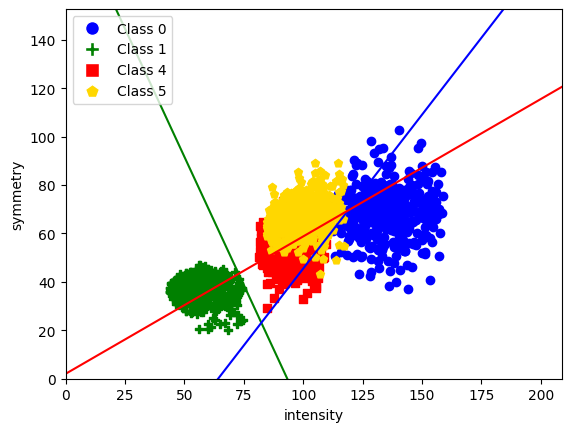

In [51]:
show_mult_model_lines(
    pd.DataFrame(X_train, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train, columns=["label"]), 
    columns=["bias", "intensity", "symmetry", "label"],
    Ws=[w4one, w4zero, w4four],
)